In [23]:
import pandas as pd

df = pd.read_csv('stellar_evolution.csv').set_index('mass')
df

,p,type,temp,l_min,l_max,m_span,s_span,g_span
mass,,,,,,,,
2.00,0.002315,A5,8200,16.0000,20.00,1.3,0.2,0.1
1.90,0.002315,A6,8000,13.0000,16.00,1.5,0.2,0.1
1.80,0.003601,A7,7800,11.0000,13.00,1.8,0.3,0.2
1.70,0.005080,A9,7500,8.6000,10.00,2.1,0.3,0.2
1.60,0.005209,F0,7300,6.7000,8.20,2.5,0.4,0.2
1.50,0.004501,F2,7000,5.1000,6.50,3.0,0.5,0.3
1.45,0.009389,F3,6900,4.3000,5.70,3.3,0.5,0.3
1.40,0.006688,F4,6700,3.7000,5.10,3.7,0.6,0.4
1.35,0.007202,F5,6600,3.1000,4.50,4.1,0.6,0.4


In [26]:
import numpy as np
from scipy.optimize import curve_fit

x = df.index
y = df.temp
popt, _ = curve_fit(lambda x, a, b: a * x + b, x, y, maxfev=3000)
a, b = popt
y_pred = x.map(lambda x: a * x + b)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)
r2

0.9861213738000962

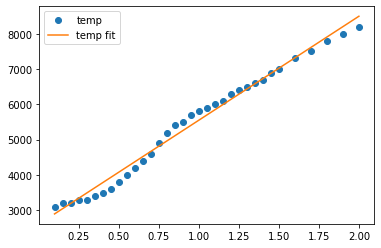

In [28]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
ax.plot(x, y, 'o', label='temp')
ax.plot(x, y_pred, '-', label='temp fit')
ax.legend()
plt.show()